In [1]:
!nvidia-smi

Sat Oct 12 09:04:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**https://www.youtube.com/watch?v=chQNuV9B-Rw**
**Youtube Video**

In [1]:
!pip install tensorflow # !pip install tensorflow-gpu is also same

In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/valid'

In [5]:
# prompt: copy images from drive to local folders

import shutil
import os

# Create local folders if they don't exist
os.makedirs('train', exist_ok=True)
os.makedirs('valid', exist_ok=True)


def copy_images(source_folder, destination_folder):
  for root, _, files in os.walk(source_folder):
    print(root,files)
    for file in files:
      #if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
      source_path = os.path.join(root, file)
      relative_path = os.path.relpath(root, source_folder)
      destination_path = os.path.join(destination_folder, relative_path, file)
      os.makedirs(os.path.dirname(destination_path), exist_ok=True)
      shutil.copy2(source_path, destination_path)


copy_images(train_path, 'train')
copy_images(valid_path, 'valid')

train_path = 'train'
valid_path = 'valid'

/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/train []
/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight ['9d71e1ca-5f24-4932-8b15-e280f6582c95___GHLB2 Leaf 94.1.JPG', 'ed06f115-9ca4-44d7-be94-e514a5ca58ce___GHLB2 Leaf 148.3.JPG', '6578c88a-fd14-450b-8e75-c94571decf83___GHLB2 Leaf 8849.JPG', 'a5d9410b-4ca9-494f-ba13-c7a01c48fa49___RS_Late.B 7147.JPG', 'e837f5b0-6d32-481e-872c-a2db611d20c3___RS_Late.B 6804.JPG', 'b8cf164c-05b8-455f-86de-fe785f40df9f___GHLB2 Leaf 8587.JPG', '728bec30-bf7b-40f0-abb5-cf6a78d018da___GHLB2 Leaf 8817.JPG', 'c3459ef4-41aa-415d-9941-e3fbdac87f20___GHLB_PS Leaf 8 Day 13.jpg', '659fd21c-cac6-4126-972d-f6f7b28f25e2___GHLB2 Leaf 9068.JPG', 'e8c3e15e-99ae-4c47-9d27-4d94c2b96e8a___GHLB_PS Leaf 26.3 Day 13.jpg', '7e5386fc-de1d-4507-acb6-e0d0da3a35da___RS_Late.B 4900.JPG', '72138adb-455c-4ddf-939e-00811e3fb6dd___GHLB2 Leaf 8750.JPG', 'cd8e0f91-3cbd-4327-9966-e8d3424d2

In [7]:
# inception V3
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet',include_top = False)

In [8]:
#https://stackoverflow.com/questions/58224816/what-does-model-trainable-false-mean-in-keras
for layer in inception.layers:
  layer.trainable = False

#folders = glob('/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/train/*')
folders = glob('train/*')

In [9]:
folders

['train/Tomato___Spider_mites Two-spotted_spider_mite',
 'train/Tomato___Tomato_mosaic_virus',
 'train/Tomato___Early_blight',
 'train/Tomato___healthy',
 'train/Tomato___Target_Spot',
 'train/Tomato___Septoria_leaf_spot',
 'train/Tomato___Bacterial_spot',
 'train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'train/Tomato___Leaf_Mold',
 'train/Tomato___Late_blight']

In [10]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = inception.input, outputs = prediction)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation only for train data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# batch size is power of 2 always and can be used as hyperparameter
# training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/train',
#                                                  target_size = (224,224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [17]:
# test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/datasets/New Plant Diseases Dataset(Augmented)/valid',
#                                                  target_size = (224,224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('valid',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [19]:
#r = model.fit_generator(training_set, validation_data=test_set, epochs = 10, steps_per_epoch = len(training_set),validation_steps = len(test_set))
r = model.fit(training_set, validation_data=test_set, epochs = 10)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 197s 340ms/step - accuracy: 0.8198 - loss: 2.0449 - val_accuracy: 0.8441 - val_loss: 1.6950
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 197s 339ms/step - accuracy: 0.8406 - loss: 1.9314 - val_accuracy: 0.8037 - val_loss: 2.6286
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 197s 338ms/step - accuracy: 0.8537 - loss: 1.8608 - val_accuracy: 0.8201 - val_loss: 2.5054
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 197s 339ms/step - accuracy: 0.8713 - loss: 1.6112 - val_accuracy: 0.7954 - val_loss: 3.7611
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 196s 338ms/step - accuracy: 0.8666 - loss: 1.8600 - val_accuracy: 0.8694 - val_loss: 1.8729
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 198s 341ms/step - accuracy: 0.8845 - loss: 1.5668 - val_accuracy: 0.8665 - val_loss: 1.9958
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 196s 338ms/step - accuracy: 0.8808 - loss: 1.8326 - val_accuracy: 0.8462 - val_loss: 2.5914
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 197s 338ms/step - accuracy: 0.9024 -

In [20]:
import matplotlib.pyplot as plt

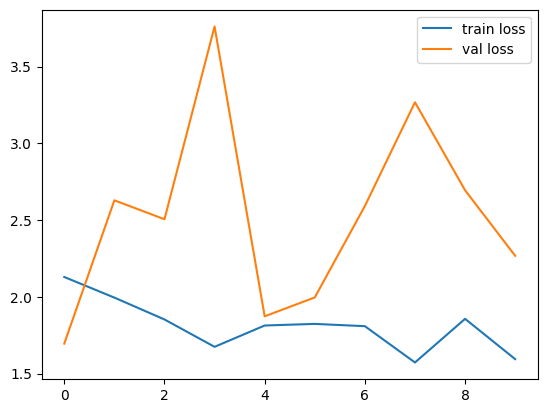

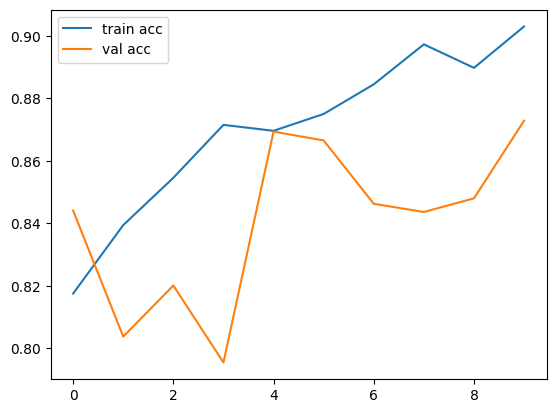

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'],label = 'train acc')
plt.plot(r.history['val_accuracy'],label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Tomato___Spider_mites Two-spotted_spider_mite


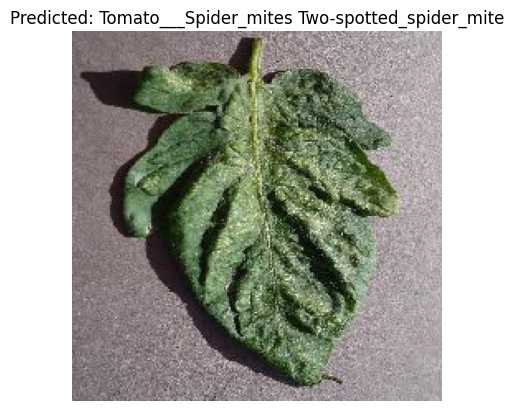

In [28]:
# prompt: build a validation model to predict the test image class

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('model_inception.h5')

# Load and preprocess the test image
img_path = '/content/valid/Tomato___Spider_mites Two-spotted_spider_mite/02c791ab-ffc3-40d4-9b42-db946eee2413___Com.G_SpM_FL 1640_180deg.JPG'  # Replace with the actual path to your test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# adds batch dimension to the input image
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values

# Make predictions
prediction = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Map the predicted class index to the class label (you'll need to define this mapping based on your dataset)
# Assuming your class labels are the folder names in 'train'
class_labels = sorted(os.listdir('train'))
predicted_label = class_labels[predicted_class]

# Display the prediction
print("Predicted class:", predicted_label)
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
